In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sb

#graphs will be printed on the page
%matplotlib inline 

#greeks definitions can be found here: https://en.wikipedia.org/wiki/Greeks_%28finance%29


def restore_param(): #dirty code to use param as global variables
    global sigma,r,q,T,t,K,S
    sigma = 0.02
    r = 0.0
    q = 0
    T = 1
    t = 0
    K = 100
    S = np.arange(80,120,0.1)
    return None
        

def d1():
    return (np.log(S / K) +(r - q + np.power(sigma,2) /2)*(T-t) ) / (sigma * np.sqrt(T-t)) 

def d2():
    return (np.log(S / K) +(r - q - np.power(sigma, 2) /2)*(T-t) ) / (sigma * np.sqrt(T-t))

def Forward():
    return  S* np.exp((-r-q) * (T-t))

def Call():
    return S * np.exp(-q * (T-t)) * norm.cdf(d1()) - K *np.exp(-r * (T-t)) * norm.cdf(d2())

def Put():
    return -S * np.exp(-q*(T-t)) * norm.cdf(-d1())  + K * exp(-r*(T-t)) * norm.cdf(-d2)
                                                                             
def Delta_C():
    return np.exp(-q*(T-t)) * norm.cdf(d1())

def Delta_P():
    return Delta_C()-1

def Gamma():
    return np.exp(-q*(T-t)) * norm.pdf(d1()) / ( S * sigma * np.sqrt(T-t))

def Vega():
    return np.exp(-q*(T-t)) * norm.pdf(d1()) * ( S * sigma * np.sqrt(T-t))

def Theta_C():
    return - np.power(sigma*S,2) * Gamma() + r*S*Delta_C() - r*Call()

def Theta_P():
    return - np.power(sigma*S,2) * Gamma() + r*S*Delta_P() - r*Put()


restore_param()

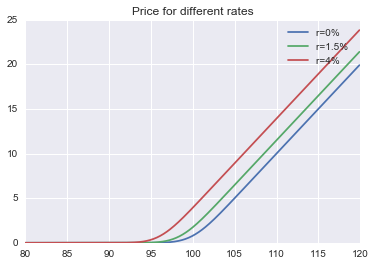

In [14]:
#price evolution with rate (call)


C1 = Call()
r = 0.015
C2 = Call()
r = 0.04
C3 = Call()

plt.plot(S, C1, label = 'r=0% ')
plt.plot(S, C2, label = 'r=1.5% ')
plt.plot(S, C3, label = 'r=4% ')

plt.title("Price for different rates")

plt.legend()
plt.show()

restore_param()

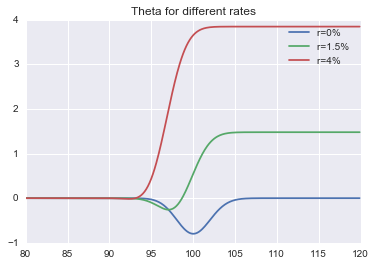

In [15]:
#Theta's evolution with rate (call)

r = 0
theta1 = Theta_C()
r = 0.015
theta2 = Theta_C()
r = 0.04
theta3 = Theta_C()

plt.plot(S, theta1, label = 'r=0% ')
plt.plot(S, theta2, label = 'r=1.5% ')
plt.plot(S, theta3, label = 'r=4% ')

plt.title("Theta for different rates")

plt.legend()
plt.show()

restore_param()

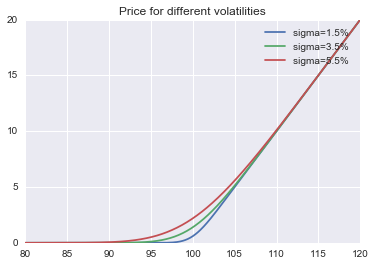

In [16]:
#price evolution with volatility (call)

sigma = 0.015
C1 = Call()
sigma = 0.035
C2 = Call()
sigma = 0.055
C3 = Call()

plt.plot(S, C1, label = 'sigma=1.5% ')
plt.plot(S, C2, label = 'sigma=3.5% ')
plt.plot(S, C3, label = 'sigma=5.5% ')

plt.title("Price for different volatilities")

plt.legend()
plt.show()

restore_param()

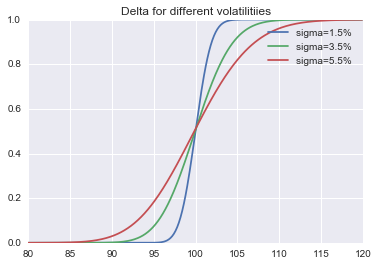

In [17]:
#delta's evolution with volatility (call)

sigma = 0.015
delta1 = Delta_C()
sigma = 0.035
delta2 = Delta_C()
sigma = 0.055
delta3 = Delta_C()

plt.plot(S, delta1, label = 'sigma=1.5% ')
plt.plot(S, delta2, label = 'sigma=3.5% ')
plt.plot(S, delta3, label = 'sigma=5.5% ')

plt.title("Delta for different volatilitiies")

plt.legend()
plt.show()

restore_param()

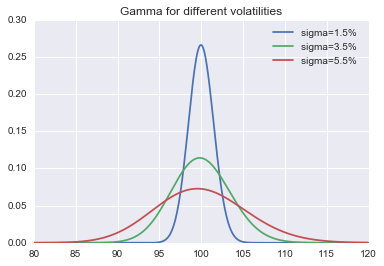

In [18]:
#gamma's evolution with volatility

sigma = 0.015
g1 = Gamma()
sigma = 0.035
g2 = Gamma()
sigma = 0.055
g3 = Gamma()

plt.plot(S, g1, label = 'sigma=1.5% ')
plt.plot(S, g2, label = 'sigma=3.5% ')
plt.plot(S, g3, label = 'sigma=5.5% ')

plt.title("Gamma for different volatilities")

plt.legend()
plt.show()

restore_param()

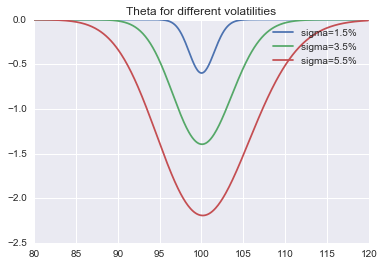

In [19]:
#Theta's evolution with volatility (call)

sigma = 0.015
theta1 = Theta_C()
sigma = 0.035
theta2 = Theta_C()
sigma = 0.055
theta3 = Theta_C()

plt.plot(S, theta1, label = 'sigma=1.5% ')
plt.plot(S, theta2, label = 'sigma=3.5% ')
plt.plot(S, theta3, label = 'sigma=5.5% ')

plt.title("Theta for different volatilities")

plt.legend()
plt.show()

restore_param()

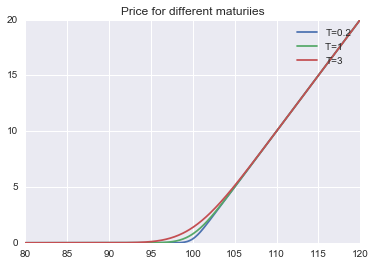

In [20]:
#Price evolution with maturity (call)

T = 0.2
C1 = Call()
T = 1
C2 = Call()
T = 3
C3 = Call()

plt.plot(S, C1, label = 'T=0.2')
plt.plot(S, C2, label = 'T=1 ')
plt.plot(S, C3, label = 'T=3')

plt.title("Price for different maturiies")

plt.legend()
plt.show()

restore_param()

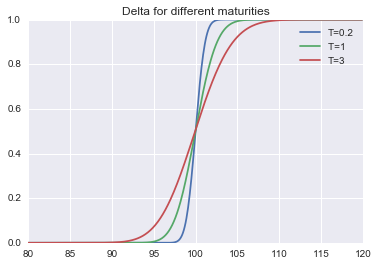

In [21]:
#delta's evolution with maturity (call)

T = 0.2
delta1 = Delta_C()
T = 1
delta2 = Delta_C()
T = 3
delta3 = Delta_C()

plt.plot(S, delta1, label = 'T=0.2')
plt.plot(S, delta2, label = 'T=1 ')
plt.plot(S, delta3, label = 'T=3')

plt.title("Delta for different maturities")

plt.legend()
plt.show()

restore_param()

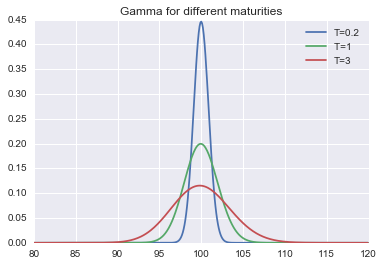

In [22]:
#Gamma's evolution with maturity (call)

T = 0.2
g1 = Gamma()
T = 1
g2 = Gamma()
T = 3
g3 = Gamma()

plt.plot(S, g1, label = 'T=0.2')
plt.plot(S, g2, label = 'T=1 ')
plt.plot(S, g3, label = 'T=3')

plt.title("Gamma for different maturities")

plt.legend()
plt.show()

restore_param()

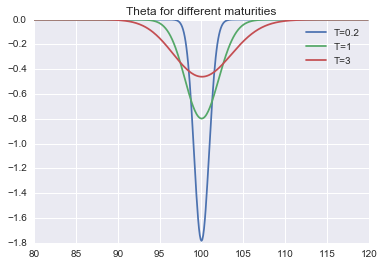

In [23]:
#Theta evolution with maturity (call)

T = 0.2
Theta1 = Theta_C()
T = 1
Theta2 = Theta_C()
T = 3
Theta3 = Theta_C()

plt.plot(S, Theta1, label = 'T=0.2')
plt.plot(S, Theta2, label = 'T=1 ')
plt.plot(S, Theta3, label = 'T=3')

plt.title("Theta for different maturities")

plt.legend()
plt.show()

restore_param()

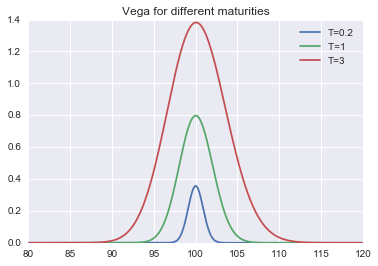

In [24]:
#Vega's evolution with maturity (call)

T = 0.2
v1 = Vega()
T = 1
v2 = Vega()
T = 3
v3 = Vega()

plt.plot(S, v1, label = 'T=0.2')
plt.plot(S, v2, label = 'T=1 ')
plt.plot(S, v3, label = 'T=3')

plt.title("Vega for different maturities")

plt.legend()
plt.show()

restore_param()